# **Chronic Kidney Disease Prediction**

##**Introduction**

Chronic kidney disease (CKD) is among the signifcant contributor to morbidity and mortality from non-communicable diseases that can afected
10–15% of the global population. Early and accurate detection of the stages of CKD
is believed to be vital to minimize impacts of patient’s health complications such
as hypertension, anemia (low blood count), mineral bone disorder, poor nutritional
health, acid base abnormalities, and neurological complications with timely intervention through appropriate medications.

## **Goal**

The Goal of this project is to use machine learning to identify patterns and trends within medical data to detect the patients likelyhood of getting chronic kidney disease (CKD) by providing some of the data related to the patients health. This can really help to prevent the patient from being a patient in the future.

## **Data Collection**

Relevant data collection is really important for modelling and making effective prediction. The data is gathered from the internet that has around 26 different medical test results of 400 patients. Some of the results are absent and some of them are not clear. Data Preprocessing is really important here.

## **About Data**

1. The data is available publically on https://www.kaggle.com/datasets/mansoordaku/ckdisease
2. The dataset contains 26 features which of different medical tests done of patients and the corresponding results.
3. Some of the features like Age, Blood pressure, Sugar levels, Blood Cell Counts, Sodium, etc and the dependent variable is the 'class' which has 'ckd' indicating the patient has the chance to get Kidney disease in the future, and 'no ckd' indicating the patient has less chance to get Kidney disease in the future.
4. The goal is to classify whether the patient has a chance to get the disease given the variables.

## **Implementation**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
# Copy for future use

df_copy = df.copy()

In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
object_columns = df.select_dtypes(include = ['object'])
print(object_columns)

    red_blood_cells  pus_cell pus_cell_clumps    bacteria packed_cell_volume  \
0               NaN    normal      notpresent  notpresent                 44   
1               NaN    normal      notpresent  notpresent                 38   
2            normal    normal      notpresent  notpresent                 31   
3            normal  abnormal         present  notpresent                 32   
4            normal    normal      notpresent  notpresent                 35   
..              ...       ...             ...         ...                ...   
395          normal    normal      notpresent  notpresent                 47   
396          normal    normal      notpresent  notpresent                 54   
397          normal    normal      notpresent  notpresent                 49   
398          normal    normal      notpresent  notpresent                 51   
399          normal    normal      notpresent  notpresent                 53   

    white_blood_cell_count red_blood_ce

## **Changing the data type from object to numbers**

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}:")

red_blood_cells: [nan 'normal' 'abnormal']:
pus_cell: ['normal' 'abnormal' nan]:
pus_cell_clumps: ['notpresent' 'present' nan]:
bacteria: ['notpresent' 'present' nan]:
hypertension: ['yes' 'no' nan]:
diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]:
coronary_artery_disease: ['no' 'yes' '\tno' nan]:
appetite: ['good' 'poor' nan]:
peda_edema: ['no' 'yes' nan]:
aanemia: ['no' 'yes' nan]:
class: ['ckd' 'ckd\t' 'notckd']:


## **Remove and Replace the values that contains noise**

In [ ]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes':'yes', ' yes':'yes'}, inplace = True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd':'not ckd'})

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,not ckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,not ckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,not ckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,not ckd


In [ ]:
# df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
# df['class'] = pd.to_numeric(df['class'], errors='coerce')

# **Exploratory Data Analysis (EDA)**

EDA is the technique of exploring the data and know its nature and characteristics including the distribution of each data using univariate analysis, relation between two variables (bivariate analysis) and relation between multiple variables (Multivariate analysis). Using statistical and visualization techniques, we can identify the patterns and the characteristics of the data which come under EDA.

## **Univariate Analysis**

Univariate analysis includes analysing each variables or features in the dataset individually one at a time.


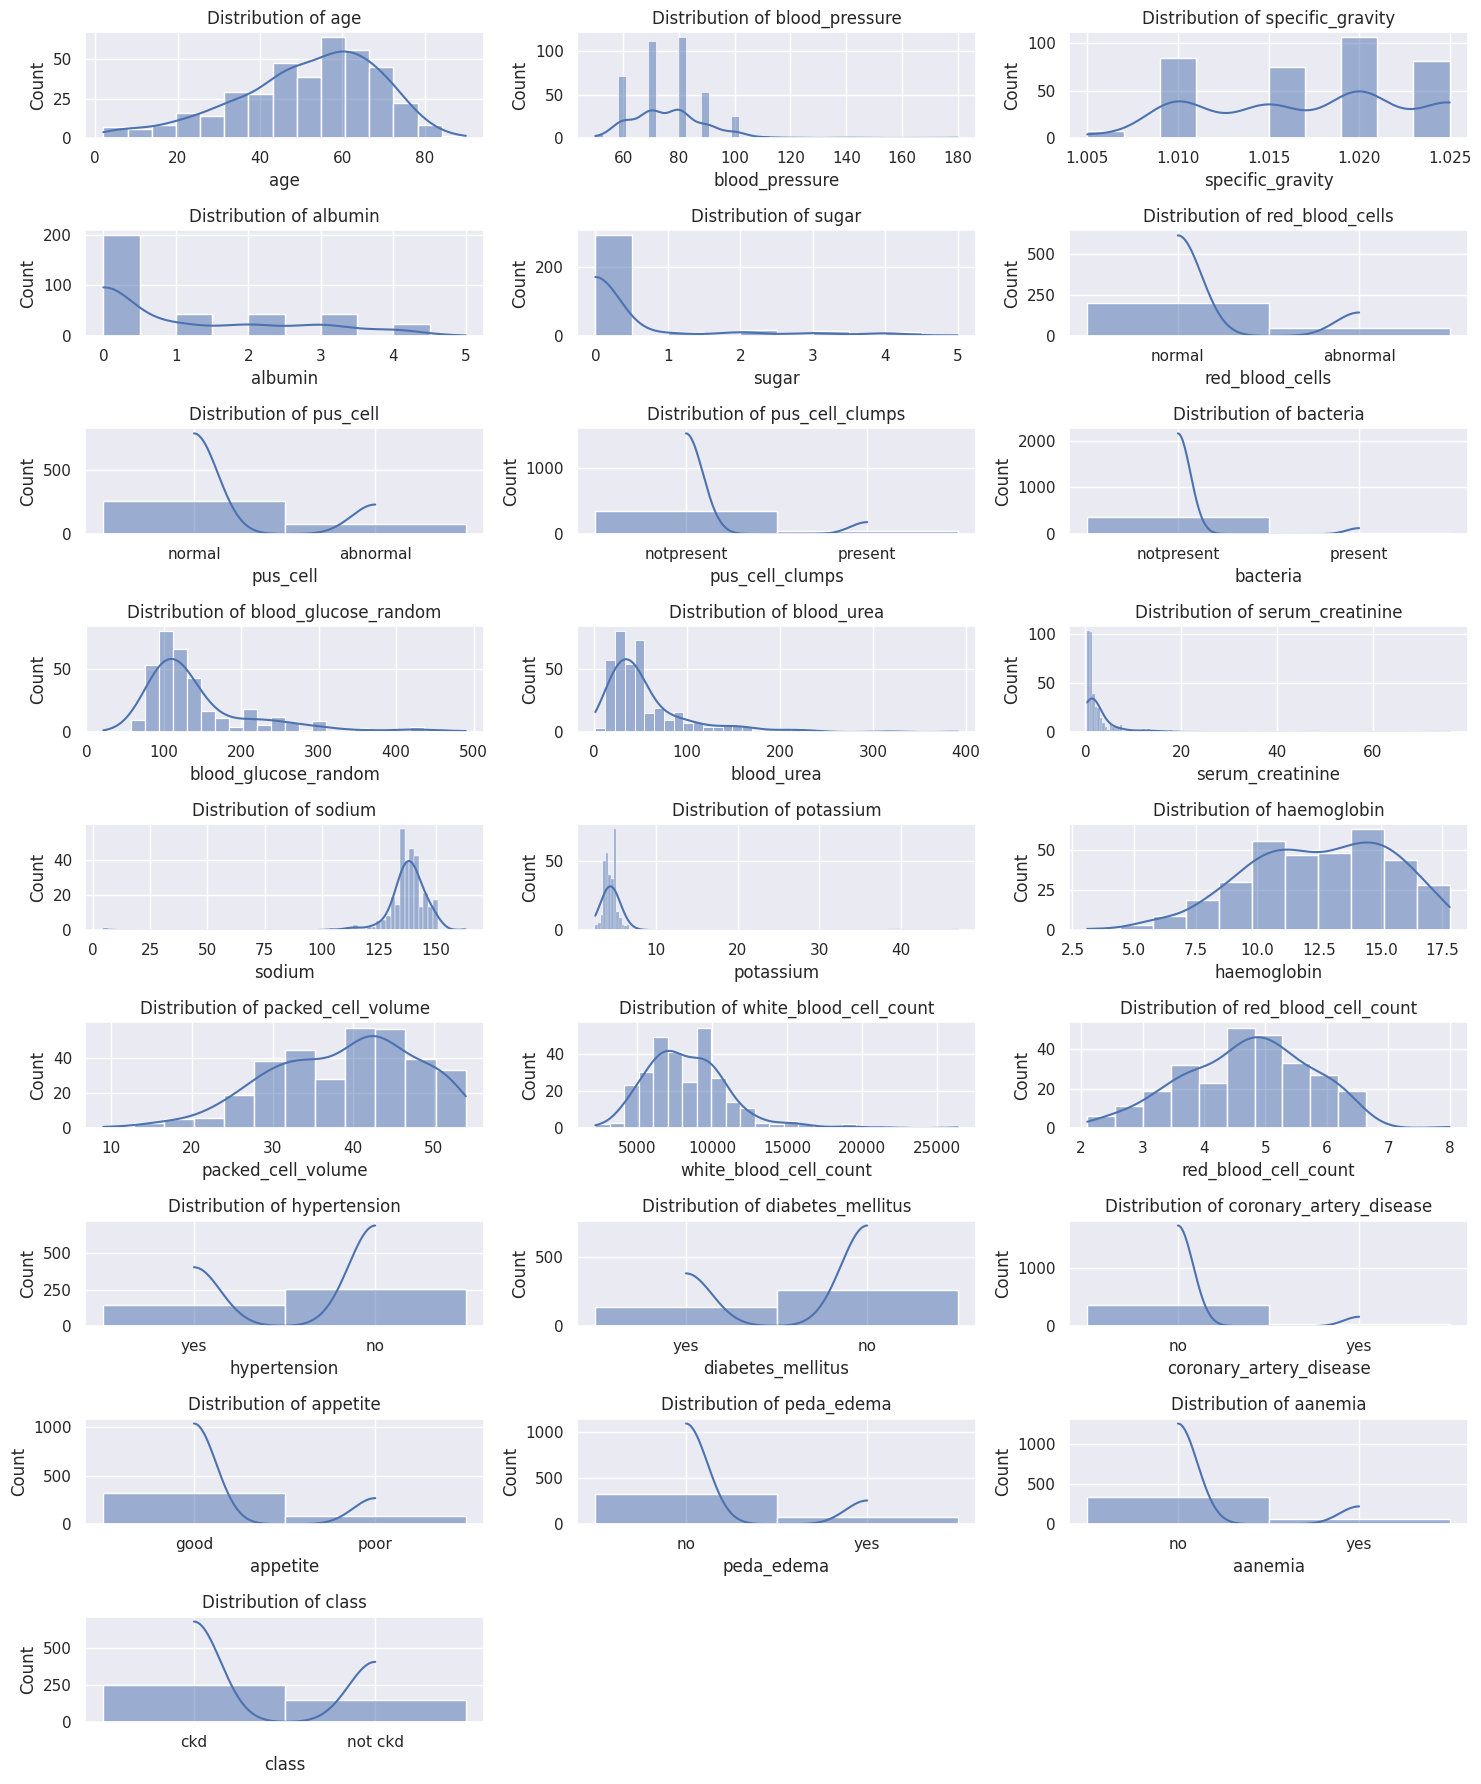

In [ ]:
feature_columns = df.columns

sns.set_theme()

num_rows = 9
num_cols = 3
plt.figure(figsize=(15, 2 * num_rows))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde = True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

## **Univariate Analysis Summary**

From the Graph, we can see that the some of the variables follows normal distribution like the Age, blood glucose random, etc. Some are categorical.

## **Univariate Analysis Summary**

### **Age Distribution:**
The plot reveals the distribution of ages in a population sample. A significant portion of individuals falls within the 50-60 years age range.

### **Blood Pressure:**
This plot represents blood pressure levels, with the majority of people having readings around 70-80 mm Hg.

### **Specific Gravity of Urine:**
The specific gravity plot indicates the concentration of urine, with most values clustering around 1.020.

### **Albumin Level in Urine:**
Albumin, a protein found in urine, is mostly at low levels in the majority of samples, suggesting normal kidney function.

### **Sugar Levels in Urine:**
Most individuals exhibit normal sugar levels, while a few show elevated levels.

### **Red Blood Cells (RBC):**
The distribution of RBC is balanced between normal and abnormal cells.

### **Presence of Pus Cell Clumps:**
Most samples do not show pus cell clumps, indicating no infection.

### **Bacterial Presence:**
The majority of samples exhibit no bacterial presence.

### **Blood Glucose Random:**
A peak around 100 mg/dl is observed, with some higher values suggesting possible diabetes.

### **Blood Urea:**
Most values fall between 0-50 mg/dl, indicating normal kidney function.

### **Serum Creatinine:**
Primarily low values are observed, indicating healthy kidney function.

### **Sodium and Potassium Levels:**
Both sodium and potassium levels are normally distributed within healthy ranges for most individuals.


## **Bivariate Analysis**

Bivariate analysis includes simultaniously analysing two variables at a time to find their correlation, distribution and how one affect the other. It uses method like correlation, covariance, scatter plots, etc for finding the relation between two variables.

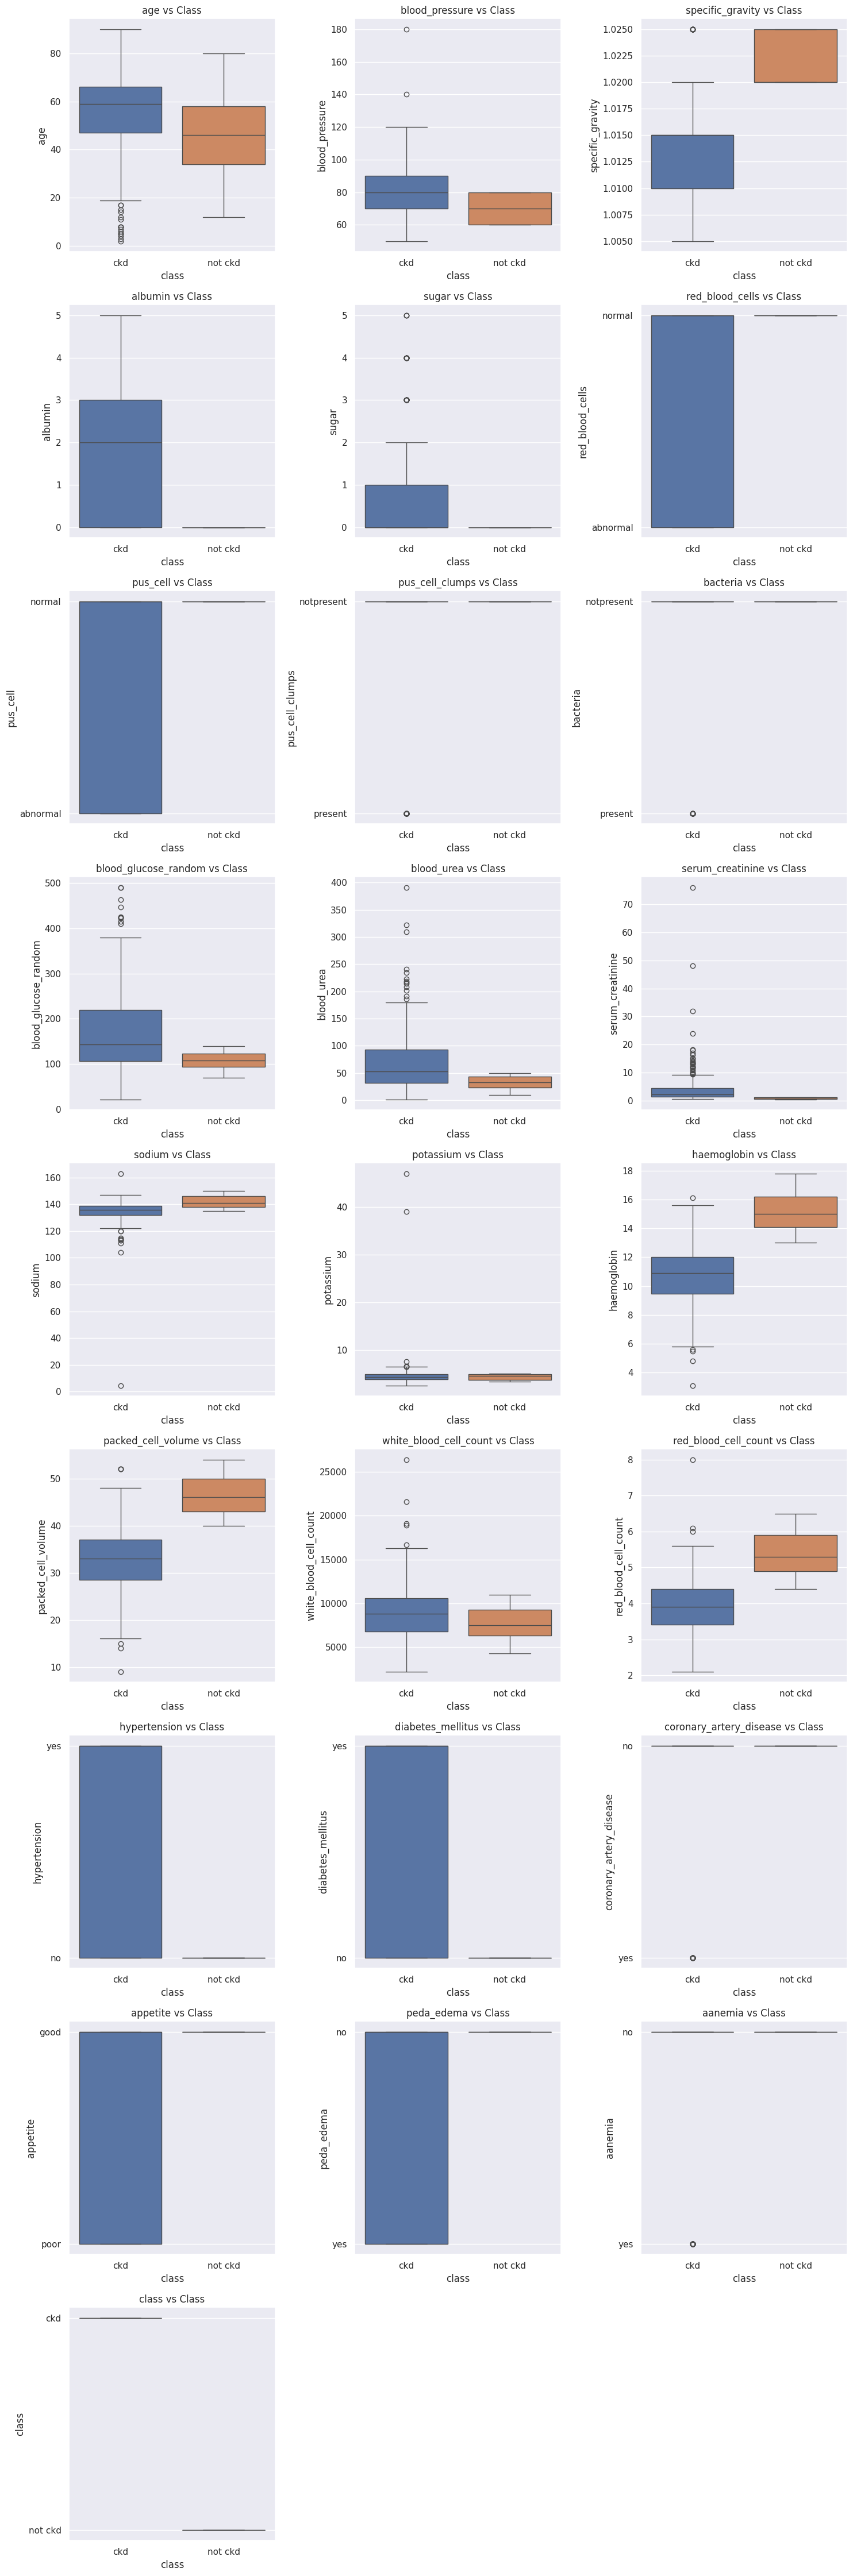

In [ ]:
feature_columns = df.columns

num_rows = 9
num_cols = 3
plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data = df, x = 'class', y = feature, hue='class')
    plt.title(f"{feature} vs Class")

plt.tight_layout()
plt.show()

## **Multivariate Analysis**

Multivariate analysis is the idea of taking mutiple variables simutaniously and analyising them. They take into accound multiple features and produce a combined result of all of the variables taken.







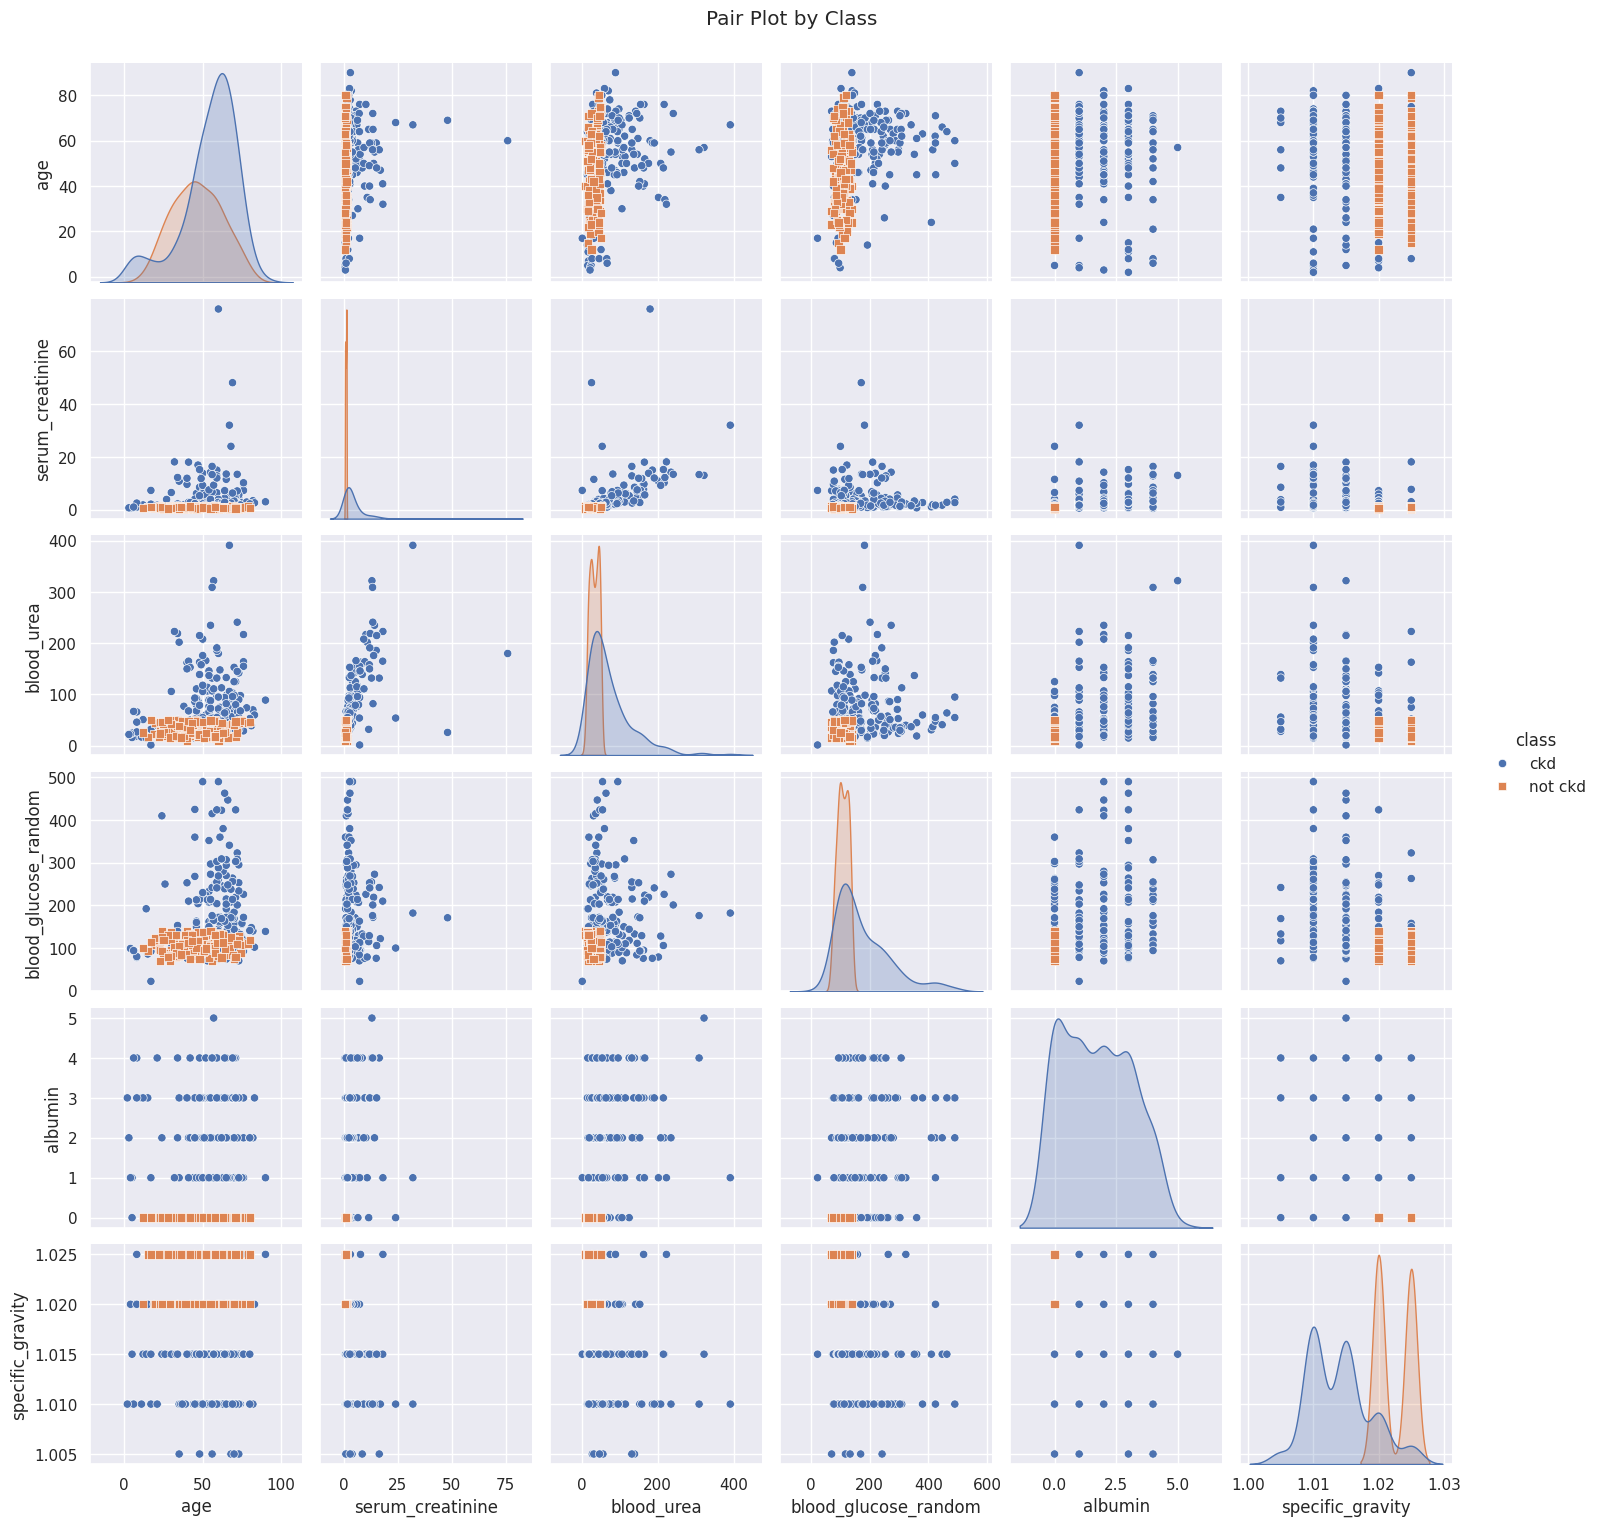

In [ ]:

# sns.set_theme(style="darkgrid")
# plt.style.use('dark_background')

subsampled_df = df.sample(frac = 0.1, random_state = 42)

selected_features = ['age', 'serum_creatinine', 'blood_urea', 'blood_glucose_random', 'hypertension', 'albumin', 'red_blood_cells', 'specific_gravity', 'class']

sns.pairplot(df[selected_features], hue = 'class', markers = ['o', 's'], diag_kind = 'kde', height = 2.5)
plt.suptitle("Pair Plot by Class", y = 1.02)
plt.show()

## **Correlation Matrix**

<ipython-input-20-762e3c71b5e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[selected_features[:-1]].corr()


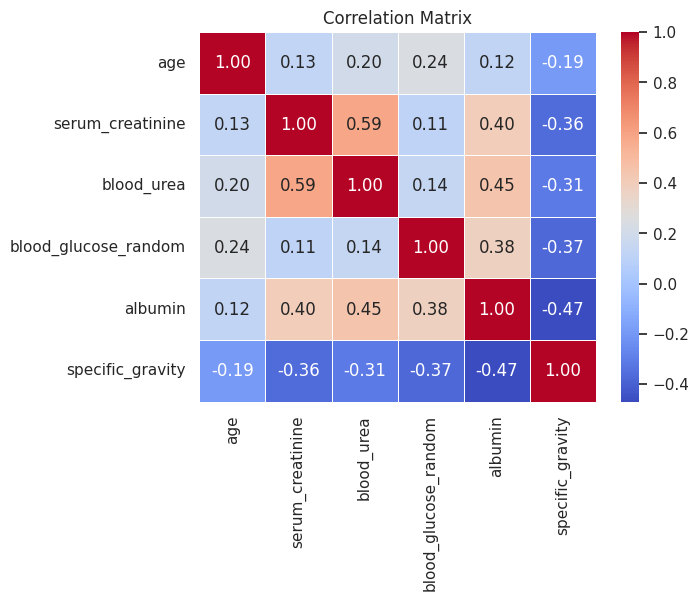

In [ ]:
corr_matrix = df[selected_features[:-1]].corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title("Correlation Matrix")
plt.show()

## **Correlation Matrix Summary**

### **Strong Positive Correlation:**

The serum creatinine level and blood urea level exhibit a strong positive correlation with a coefficient of 0.59. This means that as serum creatinine increases, blood urea tends to increase as well.

### **Negative Correlation:**

There’s a negative correlation between specific gravity and blood urea with a coefficient of -0.31. When specific gravity increases, blood urea tends to decrease.

### **No Correlation:**

Variables that are uncorrelated have coefficients close to 0. For instance, there is no significant correlation between age, blood glucose random, and albumin levels.

# **Data Preprocessing / Cleaning**

Data Preprocessing / cleaning is the process of removing noise, handling outliers, handling imbalance, etc. This involves statistical techniques to imporve the quality of messy data which then can be used for training machine learning models.

### **Handling Missing Values**

In [ ]:
df.isna().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
peda_edema                  True
aanemia                     True
class                      False
dtype: bool

In [ ]:
# Missing value percentage

df.isna().mean() * 100

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
haemoglobin                13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
class                       0.00
dtype: float64

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

### **Imputing Numerical variables**

Numerical varaibles can be imputed using mean which is a common approach. But, since the dataset has a huge portion of missing values, random sampling imputation works well.

In [ ]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample


for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

### **Imputing Categorical variables**

Imputation in categorical variables are mostly done by mode (Most occuring value). If the variable contains a huge portion of missing values, random imputation works here as well.

In [ ]:
def mode_imputation(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

# Filling the 'red_blood_cell' and 'puss_cell' with random value imputation since these two contains more number of missing values
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

# Rest of them are imputed using mean
for col in cat_cols:
    mode_imputation(col)

In [ ]:
df[cat_cols].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,108.0,...,38.0,6000.0,4.7,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,not ckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,not ckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,not ckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,not ckd


## **Categorical Featue Encoding**

Since the values are mostly in string format, we need to encode it in numbers. For example: the 'puss_cell_clumps' has values 'present' and 'not present', we need to convert it to numbers like this,

present -> 1

not present -> 0



In [ ]:
for col in cat_cols:
    print(df[col].nunique())

2
2
2
2
2
2
2
2
2
2
2


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,108.0,...,38.0,6000.0,4.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

# **Model Development and Evaluation**



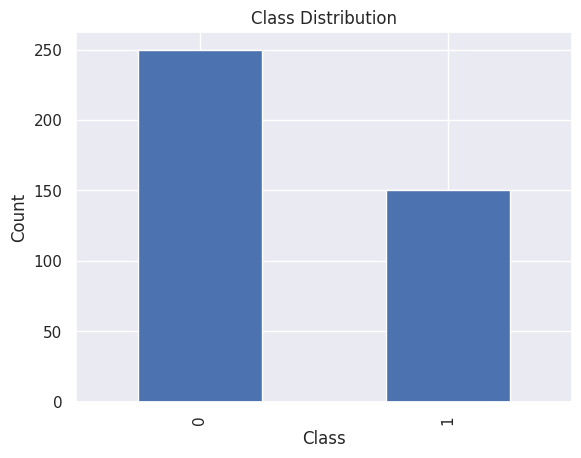

In [ ]:
# Checking for imbalance in the dataset

df['class'].value_counts().plot(kind = 'bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Scaling the dataset**

Scaling the dataset involves transforming the data points that are far apart into a specific range of values, this really helps machine learning models to perform well, since there is low computation required.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
log_reg_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(max_iter = 1000), log_reg_params, cv = 5)
log_reg.fit(X_train_scaled, y_train)


# Random Forest
rf_params = {'n_estimators':[50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4]}
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5)
rf.fit(X_train_scaled, y_train)

# Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(probability=True), svm_params, cv=5)
svm.fit(X_train_scaled, y_train)

# K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

## **Model Evaluation**

Now we can evaluate the performance of each model on the real world unseen data

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Best Model: {best_model.best_estimator_}")
    print(f"Best Parameters: {best_model.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", class_report)
    print("\n")


evaluate(log_reg, X_test_scaled, y_test)
evaluate(rf, X_test_scaled, y_test)
evaluate(svm, X_test_scaled, y_test)
evaluate(knn, X_test_scaled, y_test)

Best Model: LogisticRegression(C=0.01, max_iter=1000)
Best Parameters: {'C': 0.01}
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



Best Model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weight

# **Envalution Result**

As we can see that all the models performed really well. The Random Forest Classifier got 100% accuracy on the test data. This accuracy cannot be the same as we train these models with much more data since the current one has around 400 samples. But still the models performed really well on the real world data. Logistic Regression, SVM, and KNearest Neighbors performed almost the same with a 99% accuracy.

The precision and recall score for RandomForest is 100% percent which means, the model is able to correctly predict postive classes to all postive classes (precision), and the model is able to correctly predict postive classes to actually existing postive classes.

